<a href="https://colab.research.google.com/github/afeld/python-public-policy/blob/master/lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYU Wagner - Python Coding for Public Policy**
# Class 4: Dates and time series analysis

# LECTURE

## Importing necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px

In [ ]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data preparation

### Load 311 data

In [3]:
df = pd.read_csv('https://nyu.box.com/shared/static/dpe8ekjepi6xf5zy5hpi7n1o2dgcw699.zip', low_memory=False)

In [24]:
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)"
1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)"
2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)"
3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)"
4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)"


In [25]:
# check data types and see that dates are stores as strings (objects)

df.dtypes

Unnamed: 0                          int64
Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date    

Remember this problem?

In [26]:
df['Created Date'].min()

'01/01/2019 01:00:00 PM'

In [27]:
df['Created Date'].max()

'12/31/2018 12:59:41 PM'

### Convert columns to datetime timestamps using pandas' to_datetime

In [4]:
# if you don't provide the format string, it will take much longer to convert
# %I indicates that it's using a 12hr clock with AM and PM

df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')

In [29]:
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,0,39888071,2018-08-01 00:00:10,2018-08-01 01:52:46,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)"
1,1,39889166,2018-08-01 00:00:26,2018-08-18 10:46:43,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)"
2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)"
3,3,39894246,2018-08-01 00:01:00,2018-08-02 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)"
4,4,39881329,2018-08-01 00:01:00,2018-08-05 00:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)"


In [30]:
# check data types and confirm they are now datetime

df.dtypes

Unnamed: 0                                 int64
Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status              

In [31]:
df['Created Date'].min()

Timestamp('2018-08-01 00:00:10')

In [32]:
df['Created Date'].max()

Timestamp('2019-08-24 02:00:56')

## Compute the day of week and month for each 311 request

Add columns with date, month, weekday name, and hour using [`.dt`](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components).

In [5]:
df['year'] = df['Created Date'].dt.year
df['date'] = df['Created Date'].dt.date
df['month'] = df['Created Date'].dt.month
df['weekday_name'] = df['Created Date'].dt.day_name()
df['weekday'] = df['Created Date'].dt.weekday
df['hour'] = df['Created Date'].dt.hour

df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Segment,Latitude,Longitude,Location,year,date,month,weekday_name,weekday,hour
0,0,39888071,2018-08-01 00:00:10,2018-08-01 01:52:46,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,...,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",2018,2018-08-01,8,Wednesday,2,0
1,1,39889166,2018-08-01 00:00:26,2018-08-18 10:46:43,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,...,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",2018,2018-08-01,8,Wednesday,2,0
2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,...,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",2018,2018-08-01,8,Wednesday,2,0
3,3,39894246,2018-08-01 00:01:00,2018-08-02 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,...,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",2018,2018-08-01,8,Wednesday,2,0
4,4,39881329,2018-08-01 00:01:00,2018-08-05 00:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,...,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",2018,2018-08-01,8,Wednesday,2,0


## Does the frequency of noise complaints vary by day of the week?

### Find the count of noise complaints per day

In [12]:
# get count of noise complaints per individual date

noise = df[df['Complaint Type'] == 'Noise - Residential']
noise_per_day = noise[['date', 'weekday', 'weekday_name']].groupby(['date', 'weekday', 'weekday_name']).size().reset_index(name='count_requests')

noise_per_day.head()

,date,weekday,weekday_name,count_requests
0,2018-08-01,2,Wednesday,331
1,2018-08-02,3,Thursday,267
2,2018-08-03,4,Friday,395
3,2018-08-04,5,Saturday,943
4,2018-08-05,6,Sunday,1044


In [14]:
fig = px.line(noise_per_day, x='date', y='count_requests', title='Noise complaints per day')
fig.show()

### Find the median count of 311 requests per weekday

In [16]:
# get median count of complaints per day of week

noise_weekday = noise_per_day.groupby(['weekday', 'weekday_name'])['count_requests'].median().reset_index(name='median_requests')

noise_weekday

,weekday,weekday_name,median_requests
0,0,Monday,419.0
1,1,Tuesday,377.0
2,2,Wednesday,375.5
3,3,Thursday,372.0
4,4,Friday,525.5
5,5,Saturday,951.5
6,6,Sunday,993.0


In [22]:
fig = px.bar(noise_weekday, x='weekday_name', y='median_requests', title='Noise complaints per day of week')
fig.show()

## What about by time of day?

In [39]:
# get count of noise complaints per individual date and hour

noise_per_date_hour = df[['date', 'hour']][df['Complaint Type'] == 'Noise - Residential'].groupby(['date', 'hour']).size().reset_index(name='count_requests')

noise_per_date_hour.head()

,date,hour,count_requests
0,2018-08-01,0,29
1,2018-08-01,1,23
2,2018-08-01,2,15
3,2018-08-01,3,5
4,2018-08-01,4,5


In [40]:
# get median count of complaints per hour

noise_hour = noise_per_date_hour.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

noise_hour

,hour,median_requests
0,0,41
1,1,24
2,2,15
3,3,10
4,4,8
5,5,7
6,6,6
7,7,7
8,8,8
9,9,9


Text(0, 0.5, 'Median Count of 311 Requests')

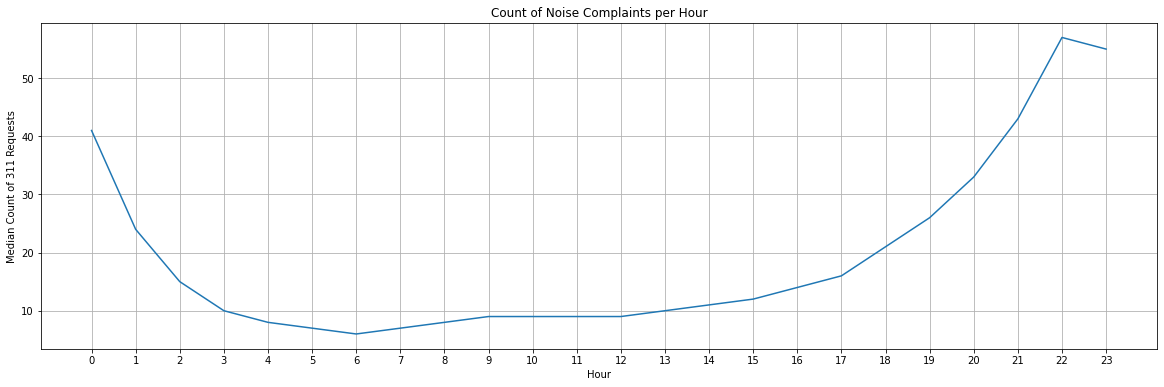

In [41]:
# create simple line plot to visualize the trend

plt.figure(figsize=(20, 6))
plt.plot(noise_hour.hour, noise_hour.median_requests)
plt.xticks(noise_hour.hour)
plt.grid()
plt.title('Count of Noise Complaints per Hour')
plt.xlabel('Hour')
plt.ylabel('Median Count of 311 Requests')

## Which 311 complaints take the longest to resolve?

In [43]:
# calculate the amount of time that passed between Created Date and Closed Date

df['resolution_duration_human'] = (df['Closed Date'] - df['Created Date'])
df['resolution_duration_sec'] = (df['Closed Date'] - df['Created Date']).astype('timedelta64[s]')

# print head to check results

df[['Closed Date', 'Created Date', 'resolution_duration_human', 'resolution_duration_sec']].head()

,Closed Date,Created Date,resolution_duration_human,resolution_duration_sec
0,2018-08-01 01:52:46,2018-08-01 00:00:10,0 days 01:52:36,6756.0
1,2018-08-18 10:46:43,2018-08-01 00:00:26,17 days 10:46:17,1507577.0
2,2018-08-01 00:49:55,2018-08-01 00:00:54,0 days 00:49:01,2941.0
3,2018-08-02 22:30:00,2018-08-01 00:01:00,1 days 22:29:00,167340.0
4,2018-08-05 00:00:00,2018-08-01 00:01:00,3 days 23:59:00,345540.0


In [44]:
print(df.resolution_duration_human.median())
print(df.resolution_duration_sec.median())

1 days 05:18:00
105480.0


In [45]:
# days 

longest = df.groupby('Complaint Type').resolution_duration_sec.median().nlargest(15).reset_index(name='median_duration')
longest.median_duration = longest.median_duration/(60*60*24)
longest

,Complaint Type,median_duration
0,FHV Licensee Complaint,117.886742
1,Taxi Complaint,99.676759
2,Radioactive Material,98.017755
3,For Hire Vehicle Complaint,96.668796
4,Graffiti,88.399213
5,New Tree Request,83.987818
6,Taxi Licensee Complaint,67.398773
7,Food Establishment,60.647442
8,Facades,53.296551
9,Sustainability Enforcement,48.295752


In [46]:
# seconds

df.groupby('Complaint Type').resolution_duration_sec.median().nsmallest(15).reset_index(name='median_duration')

,Complaint Type,median_duration
0,BEST/Site Safety,0.0
1,Construction Safety Enforcement,0.0
2,Derelict Vehicles,0.0
3,Quality of Life,0.0
4,Street Light Condition,0.0
5,Taxi Report,36.0
6,Benefit Card Replacement,38.0
7,For Hire Vehicle Report,38.0
8,Advocate-Commercial Exemptions,394.0
9,Advocate-Property Value,434.5


# HOMEWORK

[Notebook](https://colab.research.google.com/github/afeld/python-public-policy/blob/master/hw_4.ipynb)